
## **PROYECTO DATASET DIABETES🏥**



#### **IMPORTACIONES DE LIBRERIAS📚**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize


sns.set(style="whitegrid")


### **DATASET CASO INDIA DIABETES🩺**

In [ ]:
datosDiabetes = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR5fga0tvbh5N_bpCtS32Z8Ln74rxhnZF79S_HocGU2l69Rdzi5BFgM7WGjQSjI7g/pub?output=csv')
datosDiabetes


,N° embarazadas,Prueba de tolerancia oral a la glucosa,Presión arterial diastólica,Grosor del pliegue cutáneo del tríceps,Insulina sérica de 2 horas,Índice de masa corporal,Función del pedigrí de la diabetes,Edad,Variable de clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
datosDiabetes_trabajo = datosDiabetes.copy()

#**PASO 3: Revisar Datos NAN**


In [ ]:
datosDiabetes_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   N° embarazadas                          768 non-null    int64  
 1   Prueba de tolerancia oral a la glucosa  768 non-null    int64  
 2   Presión arterial diastólica             768 non-null    int64  
 3   Grosor del pliegue cutáneo del tríceps  768 non-null    int64  
 4   Insulina sérica de 2 horas              768 non-null    int64  
 5   Índice de masa corporal                 768 non-null    float64
 6   Función del pedigrí de la diabetes      768 non-null    float64
 7   Edad                                    768 non-null    int64  
 8   Variable de clase                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
datosDiabetes_trabajo.describe().T

,count,mean,std,min,25%,50%,75%,max
N° embarazadas,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Prueba de tolerancia oral a la glucosa,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Presión arterial diastólica,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Grosor del pliegue cutáneo del tríceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulina sérica de 2 horas,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Índice de masa corporal,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Función del pedigrí de la diabetes,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Edad,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Variable de clase,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
datosDiabetes_trabajo.isna().sum()


,0
N° embarazadas,0
Prueba de tolerancia oral a la glucosa,0
Presión arterial diastólica,0
Grosor del pliegue cutáneo del tríceps,0
Insulina sérica de 2 horas,0
Índice de masa corporal,0
Función del pedigrí de la diabetes,0
Edad,0
Variable de clase,0


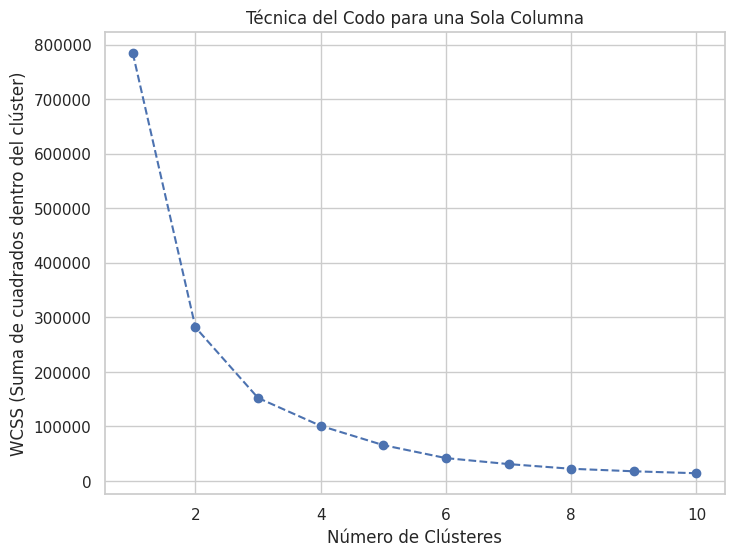

In [ ]:
X = datosDiabetes['Prueba de tolerancia oral a la glucosa'].dropna().values.reshape(-1, 1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Técnica del Codo para una Sola Columna')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de cuadrados dentro del clúster)')
plt.grid(True)

In [ ]:
datosDiabetes['Prueba de tolerancia oral a la glucosa'].value_counts()

,count
Prueba de tolerancia oral a la glucosa,
99,17
100,17
111,14
125,14
129,14
...,...
56,1
169,1
149,1


In [ ]:
round(datosDiabetes['Prueba de tolerancia oral a la glucosa'].value_counts()/np.float64(len(datosDiabetes)),2)*100

,count
Prueba de tolerancia oral a la glucosa,
99,2.0
100,2.0
111,2.0
125,2.0
129,2.0
...,...
56,0.0
169,0.0
149,0.0


### **Paso 4: Limpiar Datos**




In [ ]:
# 1. Crear una copia para insertar NaN
datosDiabetes_nan = datosDiabetes.copy()

# 2. Columna donde se insertarán NaN (ejemplo del enunciado)
columna_target_nan = "Prueba de tolerancia oral a la glucosa"

# 3. Número de NaNs a insertar
num_nans = 300

# 4. Índices aleatorios donde se insertarán los NaN
np.random.seed(42)  # para reproducibilidad
indices_nan = np.random.choice(
    datosDiabetes_nan.index,
    size=min(num_nans, len(datosDiabetes_nan)),
    replace=False
)

# 5. Insertar NaN
datosDiabetes_nan.loc[indices_nan, columna_target_nan] = np.nan

# 6. Verificar cuántos NaN hay ahora en la columna
print(f"\nNúmero de NaNs en '{columna_target_nan}' después de la inserción:",
      datosDiabetes_nan[columna_target_nan].isnull().sum())

# 7. Mostrar primeras filas de la copia con NaNs
print("\nPrimeras filas de la copia con NaNs:")
display(datosDiabetes_nan.head())

# A partir de aquí, trabajamos con esta copia que tiene NaNs
df = datosDiabetes_nan.copy()


Número de NaNs en 'Prueba de tolerancia oral a la glucosa' después de la inserción: 300

Primeras filas de la copia con NaNs:


,N° embarazadas,Prueba de tolerancia oral a la glucosa,Presión arterial diastólica,Grosor del pliegue cutáneo del tríceps,Insulina sérica de 2 horas,Índice de masa corporal,Función del pedigrí de la diabetes,Edad,Variable de clase
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,NaN,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


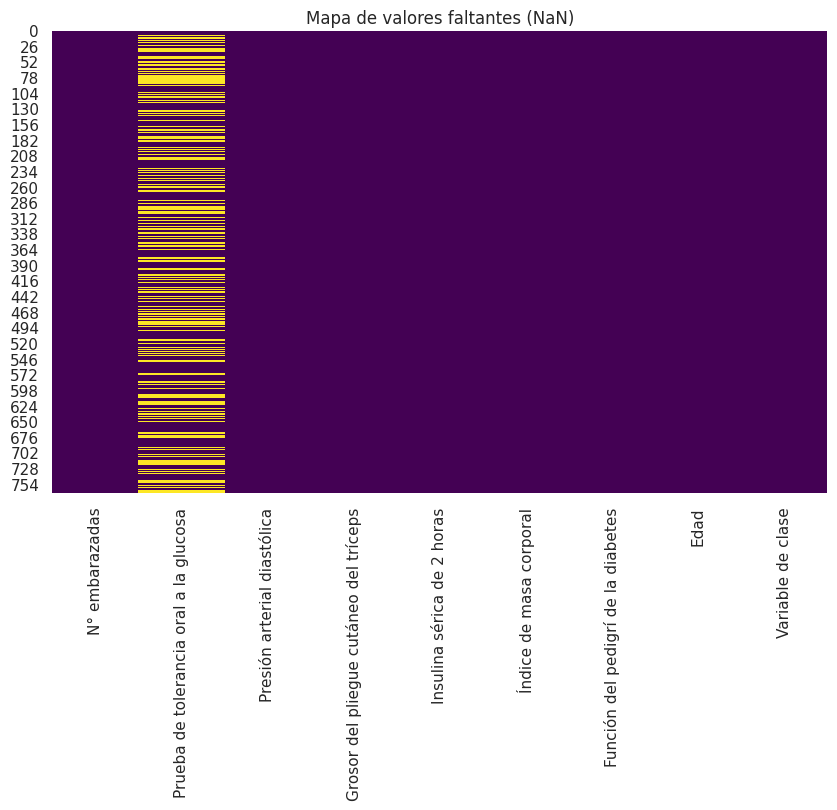

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Mapa de valores faltantes (NaN)")
plt.savefig('mapa_valores_faltantes.png', dpi=400)
plt.show()

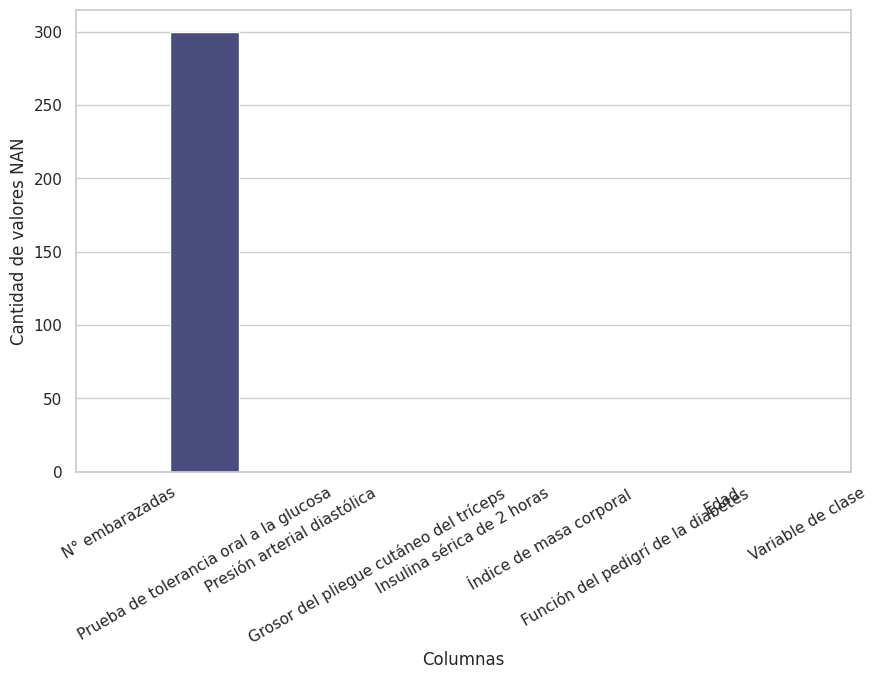

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.isna().sum().index, y=df.isna().sum().values, palette='viridis')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores NAN')
plt.xticks(rotation=30)
plt.savefig('valores_nulos.png', dpi=400)
plt.show()

In [ ]:
df.isna().sum()


,0
N° embarazadas,0
Prueba de tolerancia oral a la glucosa,300
Presión arterial diastólica,0
Grosor del pliegue cutáneo del tríceps,0
Insulina sérica de 2 horas,0
Índice de masa corporal,0
Función del pedigrí de la diabetes,0
Edad,0
Variable de clase,0


In [ ]:
# Extraer datos numéricos
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
datos_numericos = df[columnas_numericas]

# Crear imputador KNN
imputer = KNNImputer(n_neighbors=3)

# Aplicar imputación
datos_imputados = imputer.fit_transform(datos_numericos)

# Reemplazar en df
df[columnas_numericas] = datos_imputados
df.isna().sum()

,0
N° embarazadas,0
Prueba de tolerancia oral a la glucosa,0
Presión arterial diastólica,0
Grosor del pliegue cutáneo del tríceps,0
Insulina sérica de 2 horas,0
Índice de masa corporal,0
Función del pedigrí de la diabetes,0
Edad,0
Variable de clase,0


<Axes: xlabel='Prueba de tolerancia oral a la glucosa', ylabel='Density'>

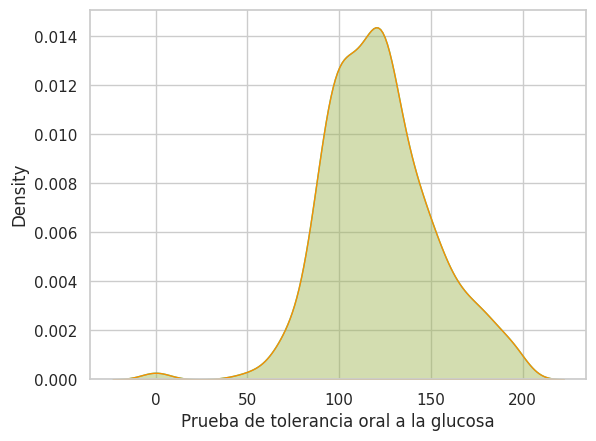

In [ ]:
datosDiabetes_copia = df.copy()

sns.kdeplot(datosDiabetes_copia['Prueba de tolerancia oral a la glucosa'].dropna(), fill=True, color='#1de9b6')

datosDiabetes_copia['Prueba de tolerancia oral a la glucosa'].fillna(datosDiabetes_copia['Prueba de tolerancia oral a la glucosa'].median(), inplace=True)

sns.kdeplot(datosDiabetes_copia['Prueba de tolerancia oral a la glucosa'], fill=True, color='#fb8c00')

### **PASO 5: Gráficas Exploratorias**

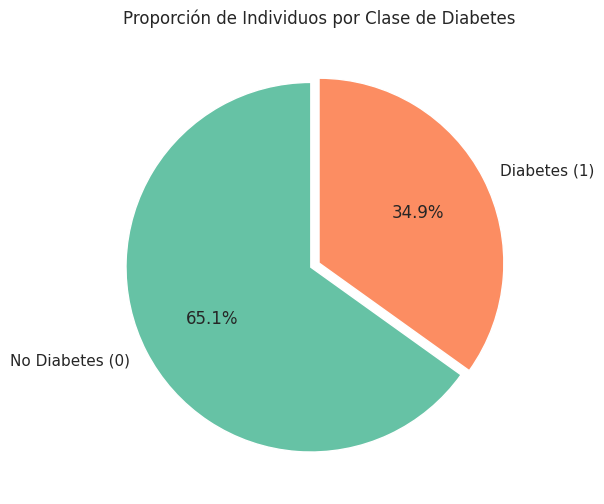

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df_pie['Cantidad'], labels=etiquetas, autopct='%1.1f%%', explode=explode, startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Proporción de Individuos por Clase de Diabetes')
plt.show()

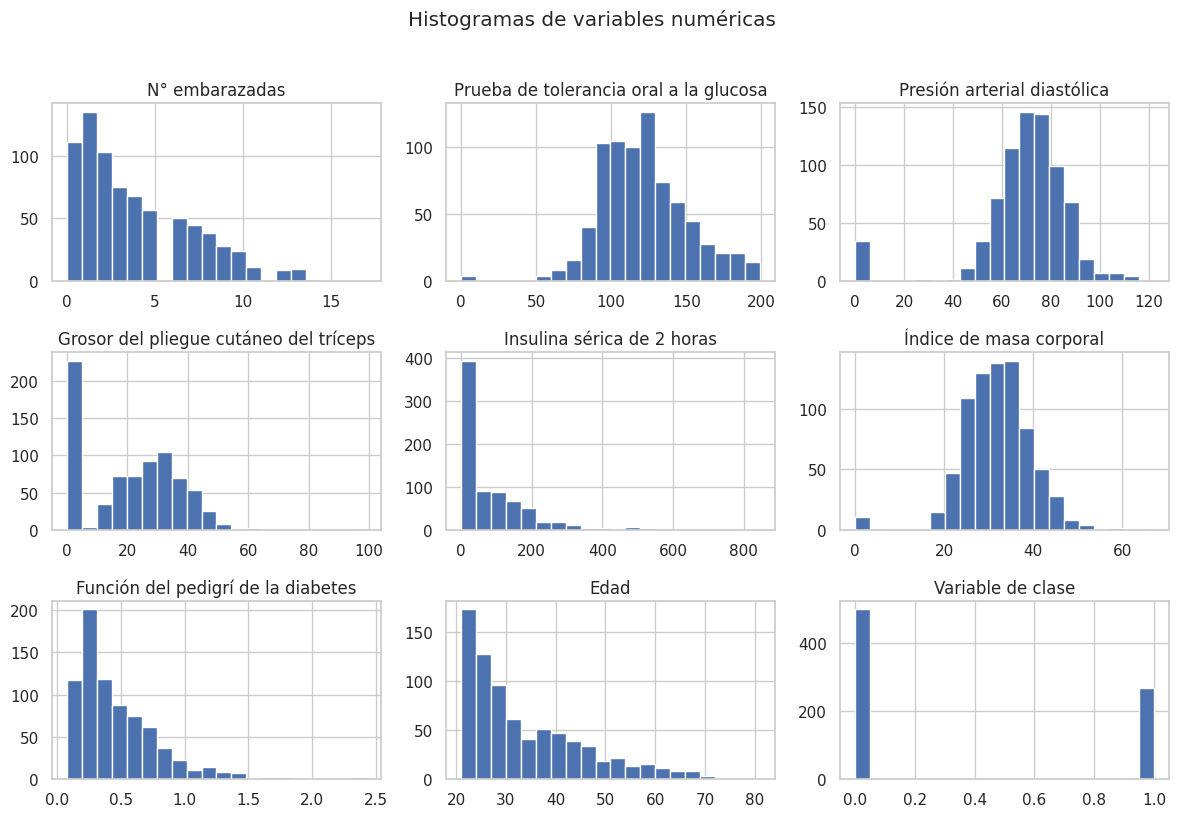

In [ ]:
df[columnas_numericas].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histogramas de variables numéricas", y=1.02)
plt.tight_layout()
plt.show()

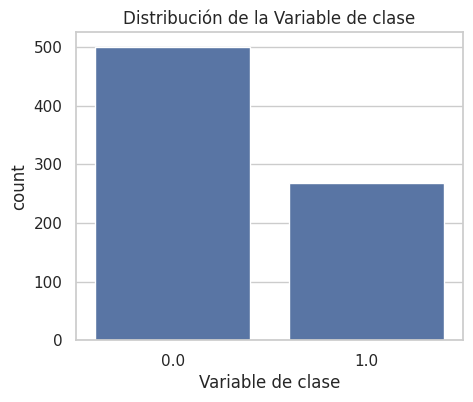

In [ ]:
columna_objetivo = "Variable de clase"

# Countplot de la variable de clase
plt.figure(figsize=(5, 4))
sns.countplot(x=columna_objetivo, data=df)
plt.title("Distribución de la Variable de clase")
plt.show()

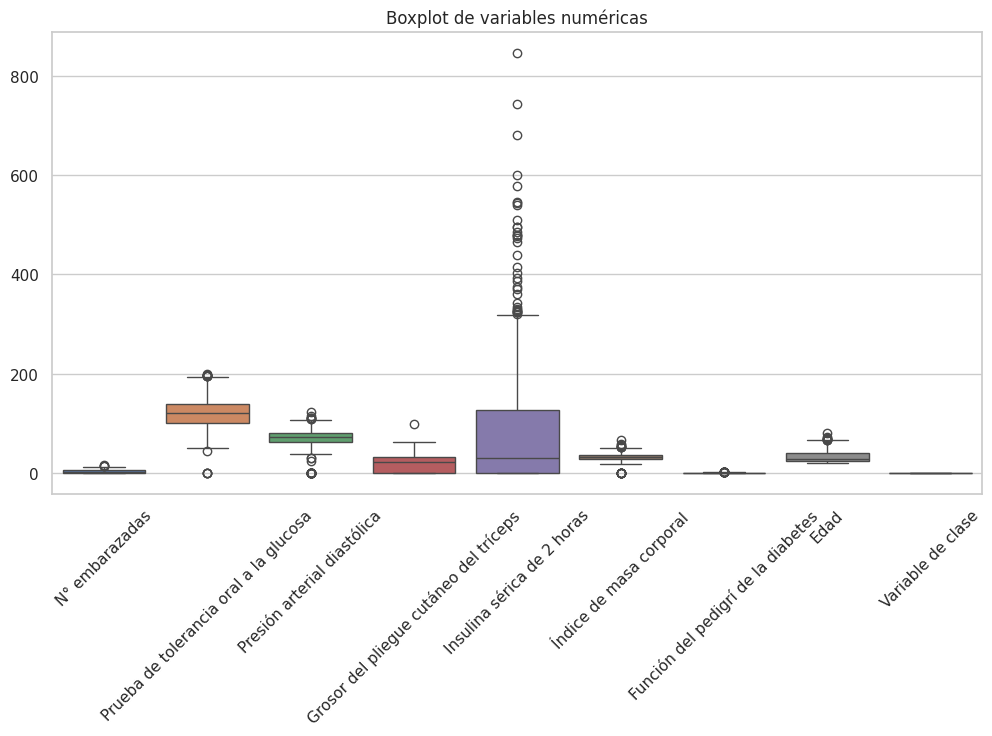

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columnas_numericas])
plt.title("Boxplot de variables numéricas")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Extraer las columnas numéricas ya imputadas del DataFrame 'df'
data_num_imputed = df.select_dtypes(include=['int64', 'float64']).copy()

# Crear una copia para no alterar los datos imputados originales
data_wins = data_num_imputed.copy()

# Aplicar winsorización a cada columna numérica (limitar extremos al 1%)
for col in data_wins.columns:
    data_wins[col] = winsorize(data_wins[col], limits=[0.01, 0.01])

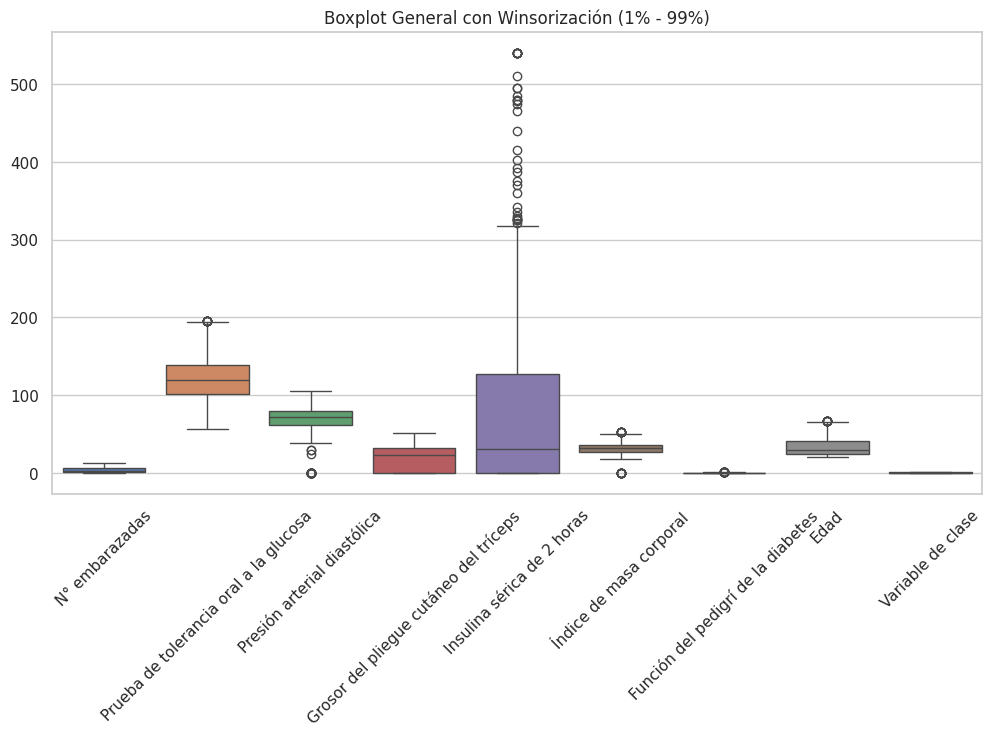

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_wins)
plt.title("Boxplot General con Winsorización (1% - 99%)")
plt.xticks(rotation=45)
plt.show()

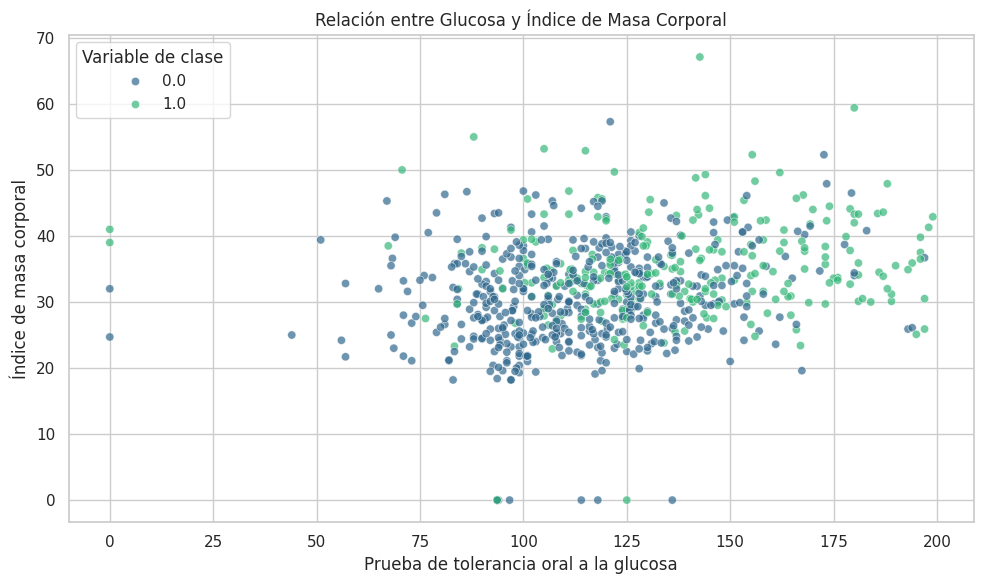

In [ ]:
  plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,   # tu DataFrame ya procesado
    x='Prueba de tolerancia oral a la glucosa',
    y='Índice de masa corporal',
    hue='Variable de clase',
    alpha=0.7,
    palette='viridis'
)

plt.title('Relación entre Glucosa y Índice de Masa Corporal')
plt.xlabel('Prueba de tolerancia oral a la glucosa')
plt.ylabel('Índice de masa corporal')
plt.tight_layout()
plt.show()


### **PASO 6: Conversión de Variables a Número**

In [ ]:
label_encoder = LabelEncoder()

# Identificar columnas categóricas (actualmente no hay después de la imputación)
columnas_categoricas = df.select_dtypes(include='object').columns

if len(columnas_categoricas) > 0:
    print(f"Columnas categóricas encontradas: {list(columnas_categoricas)}")
    for col in columnas_categoricas:
        df[col] = label_encoder.fit_transform(df[col])
else:
    print("No se encontraron columnas categóricas (tipo 'object') para aplicar LabelEncoder.")

print(
"\nTipos de datos en df después del intento de LabelEncoder:")
df.dtypes

No se encontraron columnas categóricas (tipo 'object') para aplicar LabelEncoder.

Tipos de datos en df después del intento de LabelEncoder:


,0
N° embarazadas,float64
Prueba de tolerancia oral a la glucosa,float64
Presión arterial diastólica,float64
Grosor del pliegue cutáneo del tríceps,float64
Insulina sérica de 2 horas,float64
Índice de masa corporal,float64
Función del pedigrí de la diabetes,float64
Edad,float64
Variable de clase,float64


### **Paso 7: Normalización**

In [ ]:
scaler = MinMaxScaler()

df_escalado = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

print("\nEstadísticas del DataFrame normalizado:")
display(df_escalado.describe().T)


Estadísticas del DataFrame normalizado:


,count,mean,std,min,25%,50%,75%,max
N° embarazadas,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
Prueba de tolerancia oral a la glucosa,768.0,0.611449,0.148243,0.0,0.507538,0.603015,0.695980,1.0
Presión arterial diastólica,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
Grosor del pliegue cutáneo del tríceps,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulina sérica de 2 horas,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
Índice de masa corporal,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
Función del pedigrí de la diabetes,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Edad,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0
Variable de clase,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


### **Paso 8: Matriz de Correlación**

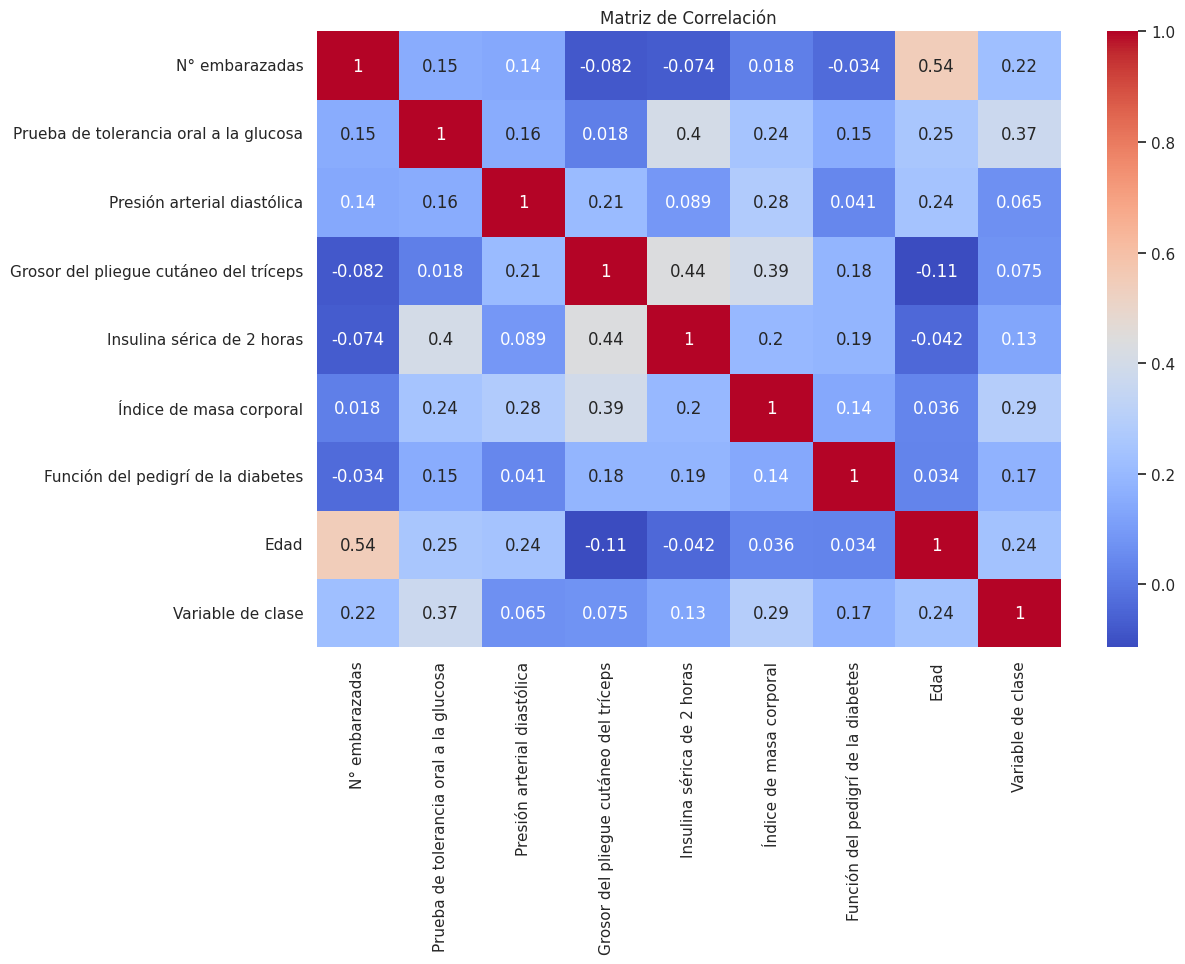

In [ ]:
correlacion = df_escalado.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(df_escalado.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


### **Paso 9: Test de normalidad**

In [ ]:
# Seleccionar solo columnas numéricas del dataset de diabetes
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

print("=== Test de Shapiro-Wilk por variable numérica (Dataset Diabetes) ===\n")
for col in columnas_numericas:
    # Tomar la columna y eliminar NaN por seguridad
    muestra = df[col].dropna()

    # Limitar a 500 observaciones si hay muchas filas
    if len(muestra) > 500:
        muestra = muestra.sample(500, random_state=42)

    # Aplicar Shapiro-Wilk
    stat, p_value = shapiro(muestra)

    # Imprimir resultado formateado
    print(f"Columna: {col:40s} | Estadístico: {stat:.4f} | p-valor: {p_value:.4f}")

print("\nInterpretación general:")
print("- Si p-valor < 0.05: se rechaza la normalidad (no es normal).")
print("- Si p-valor >= 0.05: no se rechaza la normalidad (compatible con normal).")

print("- Si p-valor >= 0.05: no se rechaza la normalidad.")

=== Test de Shapiro-Wilk por variable numérica (Dataset Diabetes) ===

Columna: N° embarazadas                           | Estadístico: 0.9012 | p-valor: 0.0000
Columna: Prueba de tolerancia oral a la glucosa   | Estadístico: 0.9752 | p-valor: 0.0000
Columna: Presión arterial diastólica              | Estadístico: 0.8010 | p-valor: 0.0000
Columna: Grosor del pliegue cutáneo del tríceps   | Estadístico: 0.8976 | p-valor: 0.0000
Columna: Insulina sérica de 2 horas               | Estadístico: 0.7195 | p-valor: 0.0000
Columna: Índice de masa corporal                  | Estadístico: 0.9378 | p-valor: 0.0000
Columna: Función del pedigrí de la diabetes       | Estadístico: 0.8456 | p-valor: 0.0000
Columna: Edad                                     | Estadístico: 0.8788 | p-valor: 0.0000
Columna: Variable de clase                        | Estadístico: 0.6057 | p-valor: 0.0000

Interpretación general:
- Si p-valor < 0.05: se rechaza la normalidad (no es normal).
- Si p-valor >= 0.05: no se rech

### **Paso 10 : Pregunta de Investigación** ✈

In [ ]:

print("Pregunta de Investigación:")
print("¿Qué tan bien pueden las variables clínicas del paciente (como número de embarazos, glucosa, presión arterial, IMC, función del pedigrí de la diabetes y edad) predecir la 'Variable de clase' (0 = no diabetes, 1 = diabetes) usando modelos de regresión lineal múltiple y Random Forest Regressor?")


Pregunta de Investigación:
¿Qué tan bien pueden las variables clínicas del paciente (como número de embarazos, glucosa, presión arterial, IMC, función del pedigrí de la diabetes y edad) predecir la 'Variable de clase' (0 = no diabetes, 1 = diabetes) usando modelos de regresión lineal múltiple y Random Forest Regressor?


### **Paso 11: Modelo de Prediccióm**

In [ ]:
columna_objetivo = "Variable de clase"

# Validar que exista en el DataFrame escalado
if columna_objetivo not in df_escalado.columns:
    raise ValueError(f"La columna objetivo '{columna_objetivo}' no existe en el DataFrame df_escalado.")

# 2. Separar X (predictoras) e y (objetivo)
X = df_escalado.drop(columns=[columna_objetivo])
y = df_escalado[columna_objetivo]

# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Tamaños de los conjuntos:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("y_train:", y_train.shape, " | y_test:", y_test.shape)

Tamaños de los conjuntos:
X_train: (614, 8)  | X_test: (154, 8)
y_train: (614,)  | y_test: (154,)


In [ ]:
modelo_lineal = LinearRegression()

# Entrenar el modelo
modelo_lineal.fit(X_train, y_train)

# Predecir
y_pred_lineal = modelo_lineal.predict(X_test)

# Métricas de evaluación
mae_lineal  = mean_absolute_error(y_test, y_pred_lineal)
mse_lineal  = mean_squared_error(y_test, y_pred_lineal)
rmse_lineal = np.sqrt(mse_lineal)
r2_lineal   = r2_score(y_test, y_pred_lineal)

print("\n===== MODELO 1: REGRESIÓN LINEAL MÚLTIPLE =====")
print("MAE  :", mae_lineal)
print("MSE  :", mse_lineal)
print("RMSE :", rmse_lineal)
print("R²   :", r2_lineal)



===== MODELO 1: REGRESIÓN LINEAL MÚLTIPLE =====
MAE  : 0.40049461468175934
MSE  : 0.21101942282101932
RMSE : 0.45936850438511706
R²   : 0.0808931806017823


“El modelo de regresión lineal múltiple obtuvo un R² = 0, lo que indica que no logra explicar la variabilidad de la glucosa en este dataset. Esto sugiere que la relación entre las variables no es lineal o que existe ruido significativo en los datos. Aunque los errores (MAE, MSE, RMSE) son pequeños, esto se debe a que los datos están normalizados. Por lo tanto, la regresión lineal no es un modelo adecuado para este problema.”

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Entrenar
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)

# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("===== MODELO 2: RANDOM FOREST REGRESSOR =====")
print("MAE :", mae_rf)
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)

===== MODELO 2: RANDOM FOREST REGRESSOR =====
MAE : 0.3750974025974026
MSE : 0.20614139610389612
RMSE: 0.45402796841592935
R²  : 0.10213969696969671


In [ ]:
print("\n===== COMPARACIÓN DE MODELOS (Resumen) ====")
print("Regresión Lineal Múltiple -> R²:", r2_lineal, " | RMSE:", rmse_lineal)
print("Random Forest Regressor   -> R²:", r2_rf,     " | RMSE:", rmse_rf)

print("\nComentario:")
print("- Un R² más cercano a 1 indica mejor ajuste del modelo.")
print("- Un RMSE más bajo indica menor error promedio en la predicción.")


===== COMPARACIÓN DE MODELOS (Resumen) ====
Regresión Lineal Múltiple -> R²: 0.0808931806017823  | RMSE: 0.45936850438511706
Random Forest Regressor   -> R²: 0.10213969696969671  | RMSE: 0.45402796841592935

Comentario:
- Un R² más cercano a 1 indica mejor ajuste del modelo.
- Un RMSE más bajo indica menor error promedio en la predicción.


In [ ]:
coeficientes_lineal = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_lineal.coef_
}).sort_values('Coeficiente', key=lambda s: s.abs(), ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES (Regresión Lineal) ===")
print(coeficientes_lineal)


=== IMPORTANCIA DE VARIABLES (Regresión Lineal) ===
                                 Variable  Coeficiente
5                 Índice de masa corporal     1.033464
1  Prueba de tolerancia oral a la glucosa     0.949407
7                                    Edad     0.459151
6      Función del pedigrí de la diabetes     0.271284
2             Presión arterial diastólica    -0.255873
4              Insulina sérica de 2 horas    -0.200955
0                          N° embarazadas     0.157066
3  Grosor del pliegue cutáneo del tríceps     0.040859
